# **이미지 데이터 셋을 이용한 CNN Modeling**

## **Logo_Data_Set Categorical Classification**
- Train_Data : 498
- Test_Data : 177

In [1]:
import warnings
warnings.filterwarnings('ignore')

## **Import TensorFlow**

In [2]:
import tensorflow

tensorflow.__version__

'2.5.0'

# **I. Google Drive Mount**

- 'Logo_Data.zip' 디렉토리를 구글 드라이브에 업로드

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- 마운트 결과 확인

In [4]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip'

-rw------- 1 root root 12929865 Mar 31 15:08 '/content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip'


# **II. Data Preprocessing**

> ## **1) Unzip 'Logo_Data.zip**

In [5]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/Logo_Data.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip
replace test/Adidas/4606245138.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test/Adidas/4606245138.jpg  
 extracting: test/Adidas/Adidas_17.png  
 extracting: test/Adidas/Adidas_18.png  
 extracting: test/Adidas/Adidas_20.png  
 extracting: test/Adidas/Adidas_4.png  
 extracting: test/Adidas/Adidas_6.png  
 extracting: test/Adidas/Adidas_7.png  
  inflating: test/Apple/4748791597.jpg  
  inflating: test/Apple/Apple_10.jpg  
 extracting: test/Apple/Apple_12.png  
 extracting: test/Apple/Apple_14.png  
 extracting: test/Apple/Apple_16.png  
 extracting: test/Apple/Apple_18.png  
 extracting: test/Apple/Apple_20.png  
  inflating: test/BMW/3744679341.jpg  
  inflating: test/BMW/BMW_11.jpg     
  inflating: test/BMW/BMW_14.jpg     
  inflating: test/BMW/BMW_17.jpg     
  inflating: test/BMW/BMW_8.jpg      
  inflating: test/Citroen/2588612032.jpg  
  inflating: test/Citroen/Citroen_1.jpg  
  inflating: te

> ## **2) Image_File Directory Setting**
- train_dir
- valid_dir
- test_dir

In [6]:
train_dir = 'train'
valid_dir = 'test'
test_dir = 'test'

> ## **3) ImageDataGenerator() & flow_from_directory()**

- Normarlization
  - ImageDataGenerator()
- Resizing & GeneratorExit
  - flow_from_directory()

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(75, 75),
                                                    batch_size=8,
                                                    class_mode='categorical')

valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size=(75, 75),
                                                    batch_size=8,
                                                    class_mode='categorical')

Found 498 images belonging to 27 classes.
Found 177 images belonging to 27 classes.


> ## **4) Test train_generator**

In [8]:
for data_batch, labels_batch in train_generator:
  print('배치 데이터 크기 :', data_batch.shape)
  print('배치 레이블 크기 :', labels_batch.shape)
  break

배치 데이터 크기 : (8, 75, 75, 3)
배치 레이블 크기 : (8, 27)


In [9]:
labels_batch

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

# **III. CNN Keras Modeling**

> ## **1) Model Define**

- Feature Extraction & Classification

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(75, 75, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(27, activation = 'softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

> ## **2) Model Compile**

- 모델 학습 방법 설정

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

> ## **3) Model Fit**

- 약 5분

In [13]:
%%time

Hist_dandc = model.fit(train_generator,
                       steps_per_epoch=62,
                       epochs=200,
                       validation_data=valid_generator,
                       validation_steps=22)

Epoch 1/200
62/62 [==============================] - 3s 25ms/step - loss: 3.2492 - accuracy: 0.0612 - val_loss: 3.0255 - val_accuracy: 0.1136
Epoch 2/200
62/62 [==============================] - 1s 21ms/step - loss: 2.6053 - accuracy: 0.2653 - val_loss: 2.3884 - val_accuracy: 0.3750
Epoch 3/200
62/62 [==============================] - 1s 20ms/step - loss: 1.7280 - accuracy: 0.5469 - val_loss: 1.9463 - val_accuracy: 0.4659
Epoch 4/200
62/62 [==============================] - 1s 20ms/step - loss: 1.0557 - accuracy: 0.7020 - val_loss: 1.8129 - val_accuracy: 0.5114
Epoch 5/200
62/62 [==============================] - 1s 20ms/step - loss: 0.5921 - accuracy: 0.8143 - val_loss: 2.0467 - val_accuracy: 0.5511
Epoch 6/200
62/62 [==============================] - 1s 20ms/step - loss: 0.3526 - accuracy: 0.9041 - val_loss: 1.8458 - val_accuracy: 0.5966
Epoch 7/200
62/62 [==============================] - 1s 20ms/step - loss: 0.3057 - accuracy: 0.9204 - val_loss: 2.3343 - val_accuracy: 0.5682
Epoch 

> ## **4) 학습 결과 시각화**

- Loss Visualization

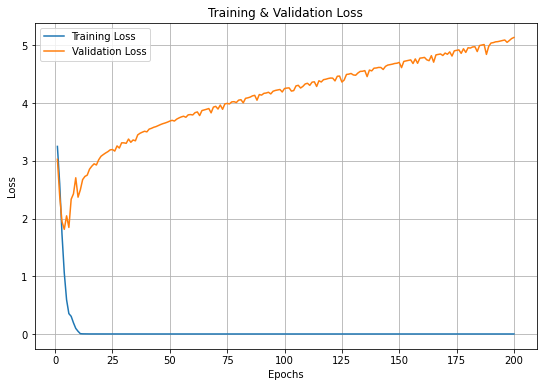

In [14]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, Hist_dandc.history['loss'])
plt.plot(epochs, Hist_dandc.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

- Accuracy Visualization

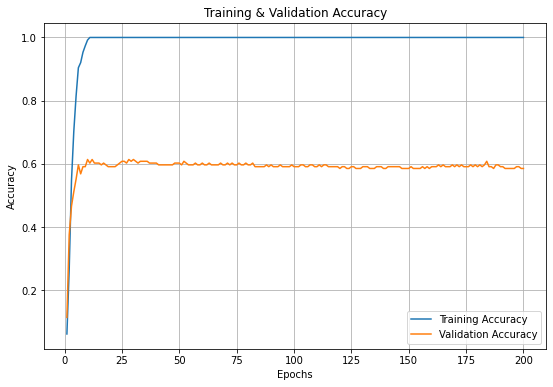

In [15]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_dandc.history['loss']) + 1)

plt.figure(figsize=(9, 6))
plt.plot(epochs, Hist_dandc.history['accuracy'])
plt.plot(epochs, Hist_dandc.history['val_accuracy'])

plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()
plt.show()

> ## **5) Model Evaluate**

- test_generator

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(75, 75),
                                                  batch_size=8,
                                                  class_mode='categorical')

Found 177 images belonging to 27 classes.


- Loss & Accuracy

In [17]:
loss, accuracy = model.evaluate(test_generator,
                                steps=22)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

22/22 [==============================] - 0s 13ms/step - loss: 5.1182 - accuracy: 0.5909
Loss = 5.11822
Accuracy = 0.59091
